In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 20)

import matplotlib
matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (18,8)

import plotly.graph_objects as go
import plotly.express as px

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
!pip install investpy
import investpy as inv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.3 MB/s 
     |████████████████████████████████| 235 kB 43.0 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=bf4def7855e6505f65b06880466c96a232edf39faeca0309b22b796f70604502
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy


##1. Funções para Busca e Tratamento de  Dados do Tesouro Direto

In [4]:
def busca_titulos_tesouro_direto():
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

##2. Buscando dados



In [5]:
#base mestre 
titulos = busca_titulos_tesouro_direto() 
#filtro do tipo de título
titulos.loc['Tesouro Prefixado']




,,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Vencimento,Data Base,,,,,
2021-01-01,2020-11-11,1.95,2.07,997.32,997.15,997.07
2023-01-01,2020-11-11,5.07,5.19,899.97,897.78,897.60
2022-01-01,2020-11-09,3.28,3.40,963.78,962.50,962.38
2026-01-01,2020-11-09,7.05,7.17,704.62,700.57,700.38
2025-01-01,2020-11-09,6.64,6.76,766.57,763.01,762.81
2021-01-01,2020-11-09,1.94,2.06,997.18,997.01,996.92
2023-01-01,2020-11-09,4.94,5.06,902.00,899.80,899.62
2025-01-01,2020-08-10,5.58,5.70,788.29,784.38,784.21
2022-01-01,2020-08-10,2.72,2.84,963.41,961.85,961.74


In [6]:
#filtro do tipo de título
titulos.loc['Tesouro IPCA+']

,,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Vencimento,Data Base,,,,,
2045-05-15,2020-11-11,4.06,4.18,1273.11,1237.77,1237.23
2026-08-15,2020-11-11,2.89,3.01,2857.07,2838.00,2836.88
2024-08-15,2020-11-11,2.04,2.16,3120.31,3106.62,3105.50
2035-05-15,2020-11-09,3.90,4.02,1934.24,1902.23,1901.40
2045-05-15,2020-11-09,3.90,4.02,1320.74,1284.01,1283.45
2026-08-15,2020-11-09,2.78,2.90,2872.47,2853.25,2852.14
2024-08-15,2020-11-09,1.97,2.09,3126.12,3112.36,3111.25
2026-08-15,2020-08-10,2.08,2.20,2924.16,2903.62,2903.03
2035-05-15,2020-08-10,3.51,3.63,1992.09,1958.44,1957.93


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


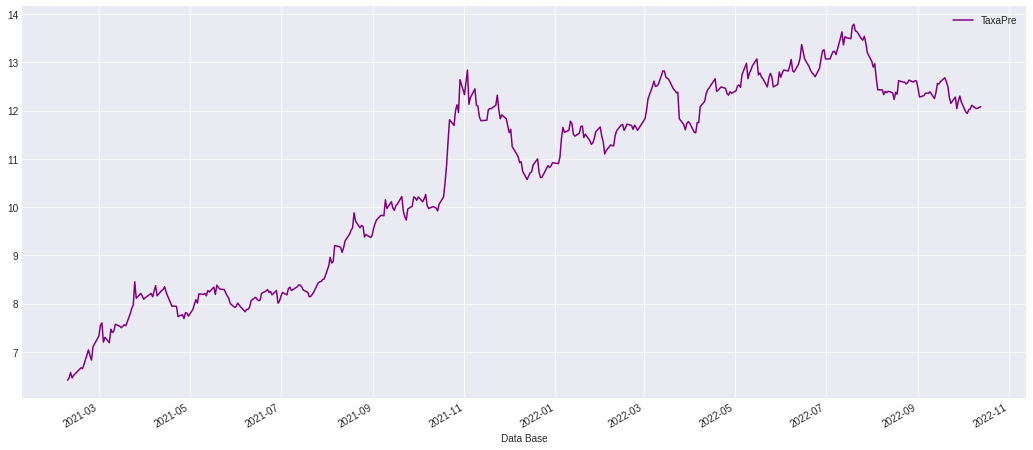

In [7]:
pre2026 = titulos.loc[('Tesouro Prefixado', '2024-07-01')]
pre2026 = pre2026.drop(columns = ['Taxa Venda Manha','PU Compra Manha','PU Venda Manha','PU Base Manha'])
pre2026.rename(columns = {'Taxa Compra Manha': 'TaxaPre'}, inplace = True)
pre2026.plot(color='purple')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


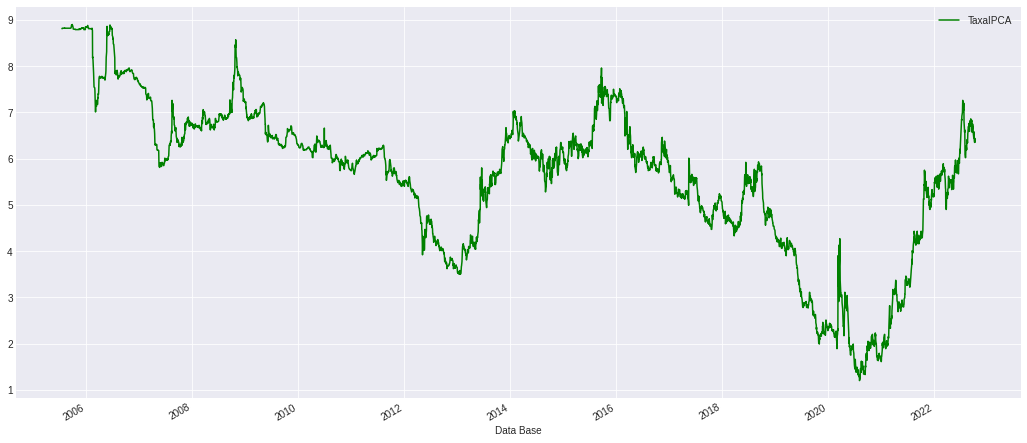

In [8]:
ipca2026 = titulos.loc['Tesouro IPCA+','2024-08-15']
ipca2026 = ipca2026.drop(columns = ['Taxa Venda Manha','PU Compra Manha','PU Venda Manha','PU Base Manha'])
ipca2026.rename(columns = {'Taxa Compra Manha': 'TaxaIPCA'}, inplace = True)
ipca2026.plot(color='green')

##3. Cálculo da Inflação Ímplicita

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


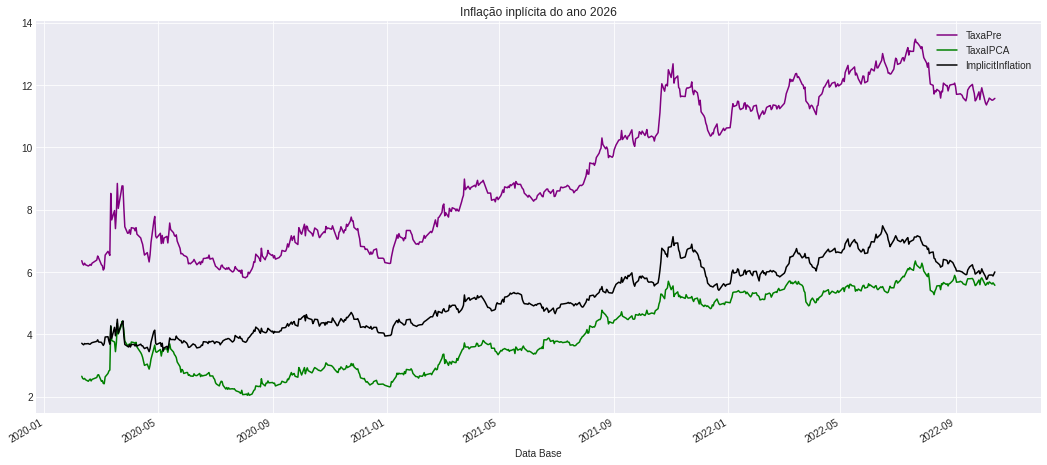

In [9]:
ano = 2026


pre = titulos.loc[('Tesouro Prefixado', f'{ano}-01-01')]
pre = pre.drop(columns = ['Taxa Venda Manha','PU Compra Manha','PU Venda Manha','PU Base Manha'])
pre.rename(columns = {'Taxa Compra Manha': 'TaxaPre'}, inplace = True)


ipca = titulos.loc['Tesouro IPCA+',f'{ano}-08-15']
ipca = ipca.drop(columns = ['Taxa Venda Manha','PU Compra Manha','PU Venda Manha','PU Base Manha'])
ipca.rename(columns = {'Taxa Compra Manha': 'TaxaIPCA'}, inplace = True)

implicit = pd.concat([pre,ipca],axis = 1)
implicit['ImplicitInflation'] = implicit['TaxaPre'] - implicit['TaxaIPCA']

implicit.dropna().plot(title = f'Inflação inplícita do ano {ano}',color=['purple','green','black'])
